<a href="https://colab.research.google.com/github/Enrique720/Proyecto-BigData/blob/main/Proyecto_ENRIQUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocesamiento -- keras






In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from pathlib import Path
import os
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/RAW_FISH_DATASET' #URL Enrique

dataset_path = Path(path)

file_path = list(dataset_path.glob(r'**/*.png'))
file_path_jpg = list(dataset_path.glob(r'**/*.JPG'))

file_path = [*file_path, *file_path_jpg]

# create labels from the folder name
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [20]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()

,image,label
0,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
1,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
2,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
3,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
4,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel


In [21]:
df_1 = df[df['label'] == 'Horse Mackerel']
df_2 = df[df['label'] == 'Gilt Head Bream']
df_3 = df[df['label'] == 'Red Mullet']
df_4 = df[df['label'] == 'Black Sea Sprat']
df_5 = df[df['label'] == 'Striped Red Mullet']
df_6 = df[df['label'] == 'Trout']
df_7 = df[df['label'] == 'Shrimp']
df_8 = df[df['label'] == 'Sea Bass']
df_9 = df[df['label'] == 'Red Sea Bream']
names= ['Horse Mackerel','Gilt Head Bream','Red Mullet','Black Sea Sprat','Striped Red Mullet','Trout','Shrimp','Sea Bass','Red Sea Bream']
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]

In [5]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
type(file_path[0])

str

In [22]:
datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [23]:
#EJECUTAR EL AUGMENTATION
%%time
inicio = time.time()
for dataframe_, name in zip(dataframes, names):
  s_path = "/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/" + name + "/"
  print(s_path)
  i = 0
  for batch in datagen.flow_from_dataframe(dataframe=dataframe_, x_col="image", y_col="label", target_size=(445,590) #(590,445) 
   , save_to_dir=s_path, batch_size=25):
    i += 1
    if i == 40:
      break
final = time.time()

/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/Horse Mackerel/
Found 50 validated image filenames belonging to 1 classes.
/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/Gilt Head Bream/
Found 50 validated image filenames belonging to 1 classes.
/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/Red Mullet/
Found 50 validated image filenames belonging to 1 classes.
/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/Black Sea Sprat/
Found 50 validated image filenames belonging to 1 classes.
/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/Striped Red Mullet/
Found 50 validated image filenames belonging to 1 classes.
/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY/Trout/
Found 50 validated image filenames belonging to 1 classes.
/content/drive/My

In [24]:
print(final-inicio)

2200.915762901306


# Preprocesamiento KERAS RAY

In [7]:
!pip install --user --ignore-installed funcsigs
!pip install ray 

  Using cached funcsigs-1.0.2-py2.py3-none-any.whl (17 kB)


In [2]:
from pathlib import Path
import os
import pandas as pd
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import ray
import time

ModuleNotFoundError: ignored

In [9]:
num_workers = 4
ray.init(num_cpus=num_workers, ignore_reinit_error=True)

{'metrics_export_port': 57646,
 'node_id': '50a4968d43edde9a25e3715d7030ccef7c7dc683bcfbdd540e790324',
 'node_ip_address': '172.28.0.2',
 'object_store_address': '/tmp/ray/session_2021-12-08_02-01-42_586340_1051/sockets/plasma_store',
 'raylet_ip_address': '172.28.0.2',
 'raylet_socket_name': '/tmp/ray/session_2021-12-08_02-01-42_586340_1051/sockets/raylet',
 'redis_address': '172.28.0.2:6379',
 'session_dir': '/tmp/ray/session_2021-12-08_02-01-42_586340_1051',
 'webui_url': None}

In [10]:
# RAY MAIN FUNCTION

@ray.remote
def data_augmentation_ray(dataframe_, name):
  #for dataframe_, name in zip(dataframes, names):
  s_path = "/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY2/" + name + "/"
  print(s_path)
  i = 0
  for batch in datagen.flow_from_dataframe(dataframe=dataframe_, x_col="image", y_col="label", target_size=(445,590) #(590,445) 
  , save_to_dir=s_path, batch_size=25):
    i += 1
    if i == 40:
      break


In [11]:
%%time
inicio = time.time()
ray.get([data_augmentation_ray.remote(dataframe_, name) for dataframe_, name in zip(dataframes, names)])
final = time.time()

(data_augmentation_ray pid=1221) /content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY2/Horse Mackerel/
(data_augmentation_ray pid=1221) Found 50 validated image filenames belonging to 1 classes.
(data_augmentation_ray pid=1220) /content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY2/Gilt Head Bream/
(data_augmentation_ray pid=1220) Found 50 validated image filenames belonging to 1 classes.
(data_augmentation_ray pid=1290) /content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY2/Red Mullet/
(data_augmentation_ray pid=1290) Found 50 validated image filenames belonging to 1 classes.
(data_augmentation_ray pid=1289) /content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY2/Black Sea Sprat/
(data_augmentation_ray pid=1289) Found 50 validated image filenames belonging to 1 classes.
(data_augmentation_ray pid=1289) /content/drive/MyDrive/Colab Notebooks/Bi

In [12]:
print("tiempo de ejecucion: "  + str(final - inicio) )

tiempo de ejecucion: 1661.2959208488464


#Model Training

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
input_shape = (445, 590, 3) # 200, 200, 3

#### Read Data Augmented:

In [8]:
dataset_path = Path(r'/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/RAY2')

file_path = list(dataset_path.glob(r'**/*.png'))

# create labels from the folder name
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()

,image,label
0,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
1,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
2,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
3,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel
4,/content/drive/MyDrive/Colab Notebooks/BigData...,Horse Mackerel


In [9]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)


In [10]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)


Shape of training data (6286, 2)
Shape of test data (2694, 2)


In [16]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import load_model

In [21]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(445, 590), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(445, 590), color_mode='rgb', class_mode='categorical', shuffle=False)
#val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 6286 validated image filenames belonging to 9 classes.
Found 2694 validated image filenames belonging to 9 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 443, 588, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 221, 294, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 219, 292, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 109, 146, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 144, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 72, 32)       0

In [12]:
from tensorflow.keras.optimizers import Adam


In [13]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, epochs=20, callbacks=callback)

Epoch 1/20
197/197 [==============================] - 1760s 9s/step - loss: 1.9035 - accuracy: 0.2429
Epoch 2/20
197/197 [==============================] - 473s 2s/step - loss: 1.3021 - accuracy: 0.4914
Epoch 3/20
197/197 [==============================] - 468s 2s/step - loss: 1.0838 - accuracy: 0.5907
Epoch 4/20
197/197 [==============================] - 469s 2s/step - loss: 0.7887 - accuracy: 0.6954
Epoch 5/20
197/197 [==============================] - 459s 2s/step - loss: 0.6623 - accuracy: 0.7436
Epoch 6/20
197/197 [==============================] - 465s 2s/step - loss: 0.5498 - accuracy: 0.7884
Epoch 7/20
197/197 [==============================] - 480s 2s/step - loss: 0.4953 - accuracy: 0.8110
Epoch 8/20
197/197 [==============================] - 448s 2s/step - loss: 0.3885 - accuracy: 0.8521
Epoch 9/20
197/197 [==============================] - 451s 2s/step - loss: 0.4106 - accuracy: 0.8505
Epoch 10/20
197/197 [==============================] - 456s 2s/step - loss: 0.3246 - accur

In [17]:
#model.save('/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/model_1000images.h5')
model = load_model('/content/drive/MyDrive/Colab Notebooks/BigData/BigDataProject/AUGMENTED DATASET/KERAS/model_1000images.h5')

In [18]:
accuracy = [0.2425, 0.4914, 0.5907, 0.6954, 0.7436, 0.7884, 0.8110, 0.8521, 0.8505, 0.8831, 0.8845, 0.8966, 0.9109, 0.9150, 0.9200, 0.9429, 0.9300, 0.9349, 0.9513]
loss = [1.9035, 1.3021, 1.0838, 0.7887, 0.6623, 0.5498, 0.3885, 0.4106, 0.3246, 0.3349, 0.2821, 0.2564, 0.2473, 0.2385, 0.2263, 0.1643, 0.2001, 0.1886, 0.1419]

In [3]:
accuracy = history.history['accuracy']
loss = history.history['loss']

NameError: ignored

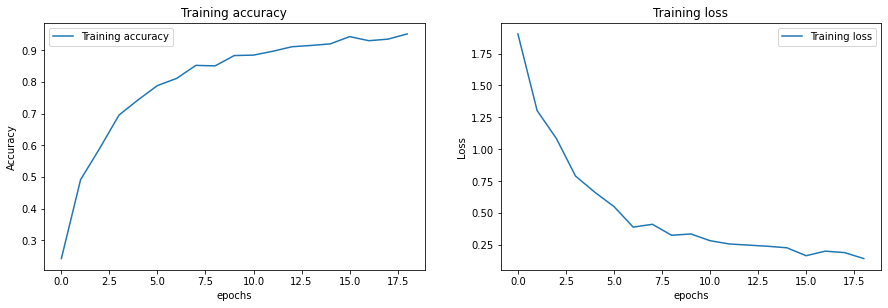

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training loss")

plt.show()

In [22]:
test_accuracy = model.evaluate(test)[1]

85/85 [==============================] - 746s 9s/step - loss: 0.1609 - accuracy: 0.9480
